In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Pareto distribution
---

CDF(x) = 1-(x/xm)^−α

The Pareto distribution is named after the economist Vilfredo Pareto,
who used it to describe the distribution of wealth 

http://wikipedia.org/wiki/Pareto_distribution

Since then, it has been used to describe
phenomena in the natural and social sciences including sizes of cities and
towns, sand particles and meteorites, forest fires and earthquakes

In [2]:
def pareto(xm,alpha,xmax):
    values = np.linspace(xm,xmax,100)
    y = [1-(x/xm)**(-alpha) for x in values]
    return values,y

In [3]:
x,y = pareto(0.5,0.3,4)

Text(0,0.5,'CDF')

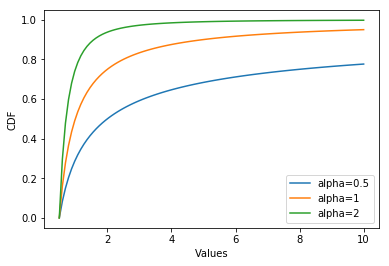

In [4]:
alpha=[0.5,1,2]
fig,ax = plt.subplots()
for a in alpha:
    x,y = pareto(0.5,a,10)
    ax.plot(x,y,label='alpha='+str(a))
ax.legend()
ax.set_xlabel('Values')
ax.set_ylabel('CDF')

There is a simple visual test that indicates whether an empirical distribution
fits a Pareto distribution: on a log-log scale, the CCDF looks like a straight
line. Let’s see why that works.
If you plot the CCDF of a sample from a Pareto distribution on a linear
scale, you expect to see a function like:

y ≈ (x/xm)^−α

Taking the log of both sides yields:

log y ≈ −α(log x − log xm)

In [5]:
os.chdir(os.path.join('..','data'))

In [6]:
df = pd.read_csv('census.csv')

In [7]:
df = df.dropna()
population = df[df['resbase42010']/1000>0]['resbase42010'].values

In [8]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

# plot the z_values(mean,std) vs z_values(0,1)
def fitLine(series):
    mean=np.mean(series)
    std = np.std(series)
    lim = [-4,4]
    y = [std*x+mean for x in lim]
    return lim,y

In [9]:
x,y = compute_cdf(population)

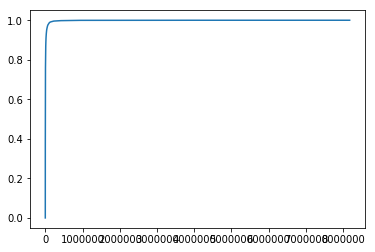

In [10]:
plt.plot(x,y)

In [11]:
# minimum possible value
xm=min(population)

Text(0.5,0,'log(pareto)')

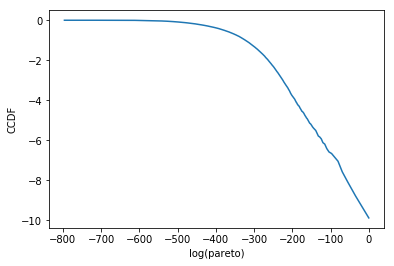

In [14]:

ccdf = [np.log(cdf) for cdf in y]
alpha = 50
log_x = [-alpha*(np.log(val)-np.log(xm)) for val in x]
plt.plot(log_x,ccdf)
plt.ylabel('CCDF')
plt.xlabel('log(pareto)')

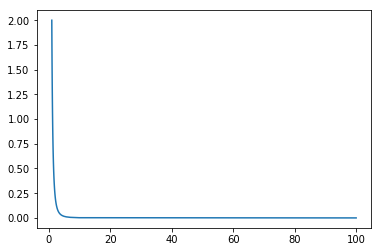

In [28]:
# plot the pareto distribution

from scipy.stats import pareto
p_values = np.linspace(start=0.0001,stop=0.9999,num=100)
b = 10
z_vals = [pareto.ppf(p,b) for p in p_values]
plt.plot(z_vals,pareto.pdf(z_vals,b))